## Explanatory Data Analysis of the project

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
from  wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import PIL.Image


import nltk
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

import seaborn as sns

from textblob import TextBlob

### Loading datasets

In [4]:
# Load data in a dataframe

dft = pd.read_csv('textblob.csv')
dfv = pd.read_csv("vader.csv")

In [56]:
# Looking at first 5 rows of the dataset

dfv.head()

Unnamed: 0 Published date  \
0           0     30/05/2024   
1           1     06/06/2024   
2           2     21/05/2024   
3           3     26/05/2024   
4           4     21/05/2024   

                                           Countries  \
0                                    England & Wales   
1                                    England & Wales   
2  United Kingdom of Great Britain and Northern I...   
3  United Kingdom of Great Britain and Northern I...   
4  United Kingdom of Great Britain and Northern I...   

                          Company  \
0                             NaN   
1                        BEST INC   
2                             NaN   
3  METROPOLITAN BANK HOLDING CORP   
4                 BIRD & BIRD LLP   

                                            Headline  \
0                Woman jailed for Bitcoin laundering   
1  Best Crypto Casino Sites & Bitcoin Casinos in ...   
2      Wright lied extensively as 'bitcoin inventor'   
3  Ex-takeaway worker with Bitcoin worth more tha...   
4            Inventor of bitcoin' given court rebuke   

                                    Cleaned Headline  \
0                          jailed bitcoin laundering   
1        best crypto casino sites bitcoin casinos uk   
2           wright lied extensively bitcoin inventor   
3  ex takeaway worker bitcoin worth 2 billion jai...   
4                inventor bitcoin given court rebuke   

                                        Lem Headline  Count  \
0                          jailed bitcoin laundering      1   
1          best crypto casino site bitcoin casino uk      2   
2           wright lied extensively bitcoin inventor      1   
3  ex takeaway worker bitcoin worth 2 billion jai...      1   
4                inventor bitcoin given court rebuke      1   

                                    sentiment_scores    neg    neu    pos  \
0  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...  0.615  0.385  0.000   
1  {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...  0.000  0.588  0.412   
2  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...  0.394  0.606  0.000   
3  {'neg': 0.244, 'neu': 0.611, 'pos': 0.145, 'co...  0.244  0.611  0.145   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   

   compound  neg.1  neu.1  pos.1  compound.1  
0   -0.4939  0.615  0.385  0.000     -0.4939  
1    0.6369  0.000  0.588  0.412      0.6369  
2   -0.3818  0.394  0.606  0.000     -0.3818  
3   -0.3182  0.244  0.611  0.145     -0.3182  
4    0.0000  0.000  1.000  0.000      0.0000

In [5]:
def get_sentiment(score):
    """
    Returns the sentiment based on compound score
    """
    
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [58]:
# Creating a new column based on compound score to get the sentiment as positive, negative or neutral using the function.
dfv['final_sentiment'] = dfv.compound.apply(lambda x: get_sentiment(x))
dfv

Unnamed: 0 Published date  \
0             0     30/05/2024   
1             1     06/06/2024   
2             2     21/05/2024   
3             3     26/05/2024   
4             4     21/05/2024   
..          ...            ...   
839        3113     11/03/2024   
840        3114     11/03/2024   
841        3115     06/03/2024   
842        3116     14/01/2024   
843        3117     11/01/2024   

                                             Countries  \
0                                      England & Wales   
1                                      England & Wales   
2    United Kingdom of Great Britain and Northern I...   
3    United Kingdom of Great Britain and Northern I...   
4    United Kingdom of Great Britain and Northern I...   
..                                                 ...   
839                                      United States   
840                                      United States   
841                                      United States   
842                                      United States   
843                                      United States   

                              Company  \
0                                 NaN   
1                            BEST INC   
2                                 NaN   
3      METROPOLITAN BANK HOLDING CORP   
4                     BIRD & BIRD LLP   
..                                ...   
839                               NaN   
840  SECURITIES & EXCHANGE COMMISSION   
841                               NaN   
842                     BANK OF KOREA   
843  SECURITIES & EXCHANGE COMMISSION   

                                              Headline  \
0                  Woman jailed for Bitcoin laundering   
1    Best Crypto Casino Sites & Bitcoin Casinos in ...   
2        Wright lied extensively as 'bitcoin inventor'   
3    Ex-takeaway worker with Bitcoin worth more tha...   
4              Inventor of bitcoin' given court rebuke   
..                                                 ...   
839    Bitcoin Soars Above $71000 To New All-time High   
840  Bitcoin tops 100 mln won in S. Korea for 1st time   
841  Bitcoin bounces to all-time high, two years af...   
842  Financial authorities rule out possibility of ...   
843  SEC chairman denies bitcoin ETF has been appro...   

                                      Cleaned Headline  \
0                            jailed bitcoin laundering   
1          best crypto casino sites bitcoin casinos uk   
2             wright lied extensively bitcoin inventor   
3    ex takeaway worker bitcoin worth 2 billion jai...   
4                  inventor bitcoin given court rebuke   
..                                                 ...   
839                  bitcoin soars 71000 new time high   
840                bitcoin tops 100 mln korea 1st time   
841        bitcoin bounces time high two years scandal   
842  financial authorities rule possibility bitcoin...   
843  chairman denies bitcoin etf approved account x...   

                                          Lem Headline  Count  \
0                            jailed bitcoin laundering      1   
1            best crypto casino site bitcoin casino uk      2   
2             wright lied extensively bitcoin inventor      1   
3    ex takeaway worker bitcoin worth 2 billion jai...      1   
4                  inventor bitcoin given court rebuke      1   
..                                                 ...    ...   
839                   bitcoin soar 71000 new time high      1   
840                 bitcoin top 100 mln korea 1st time      1   
841          bitcoin bounce time high two year scandal      1   
842  financial authority rule possibility bitcoin e...      1   
843  chairman denies bitcoin etf approved account x...      2   

                                      sentiment_scores    neg    neu    pos  \
0    {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...  0.615  0.385  0.000   
1    {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...  0.000  0.588  0.4

### Analysing WordCloud for the most occuring words in aspects of positive, negative and neutral affect

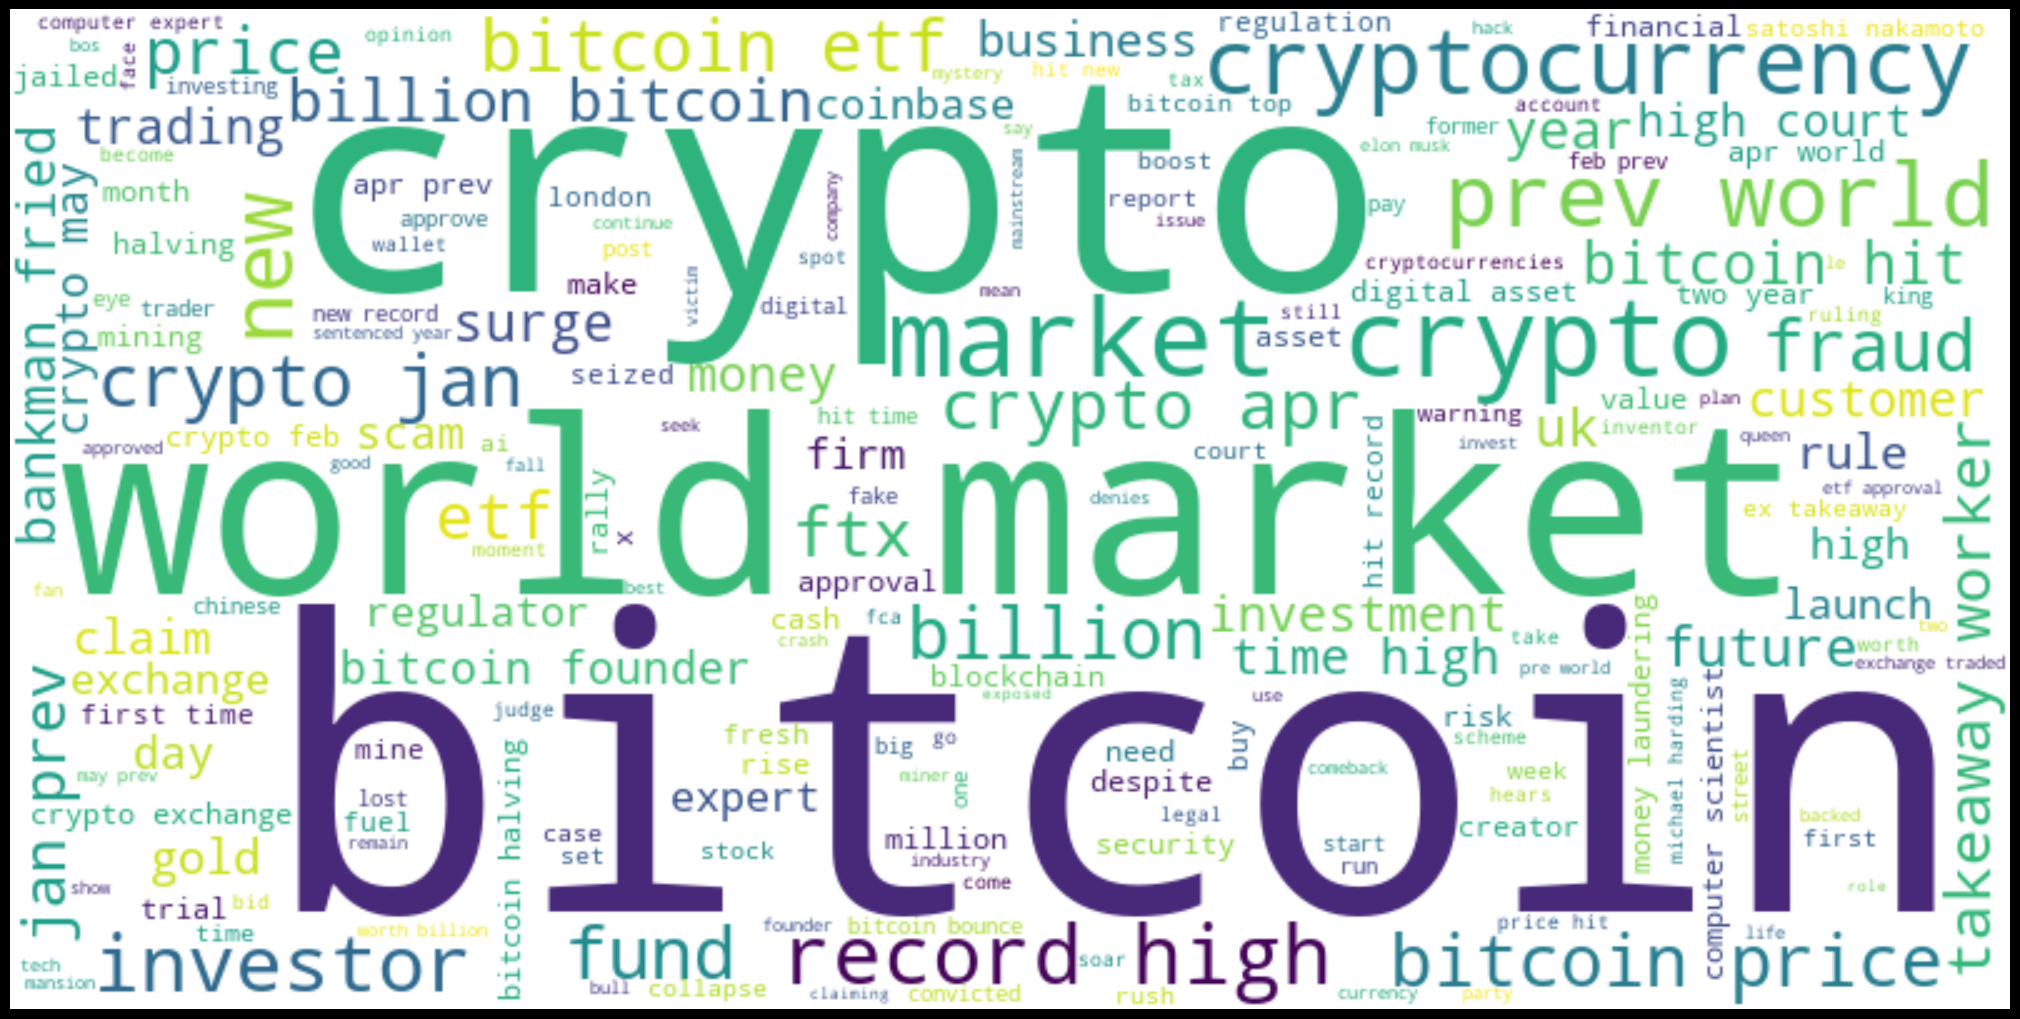

In [59]:
# Combine all headlines into a single string
text = ' '.join(dfv['Lem Headline'])

# Create a word cloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

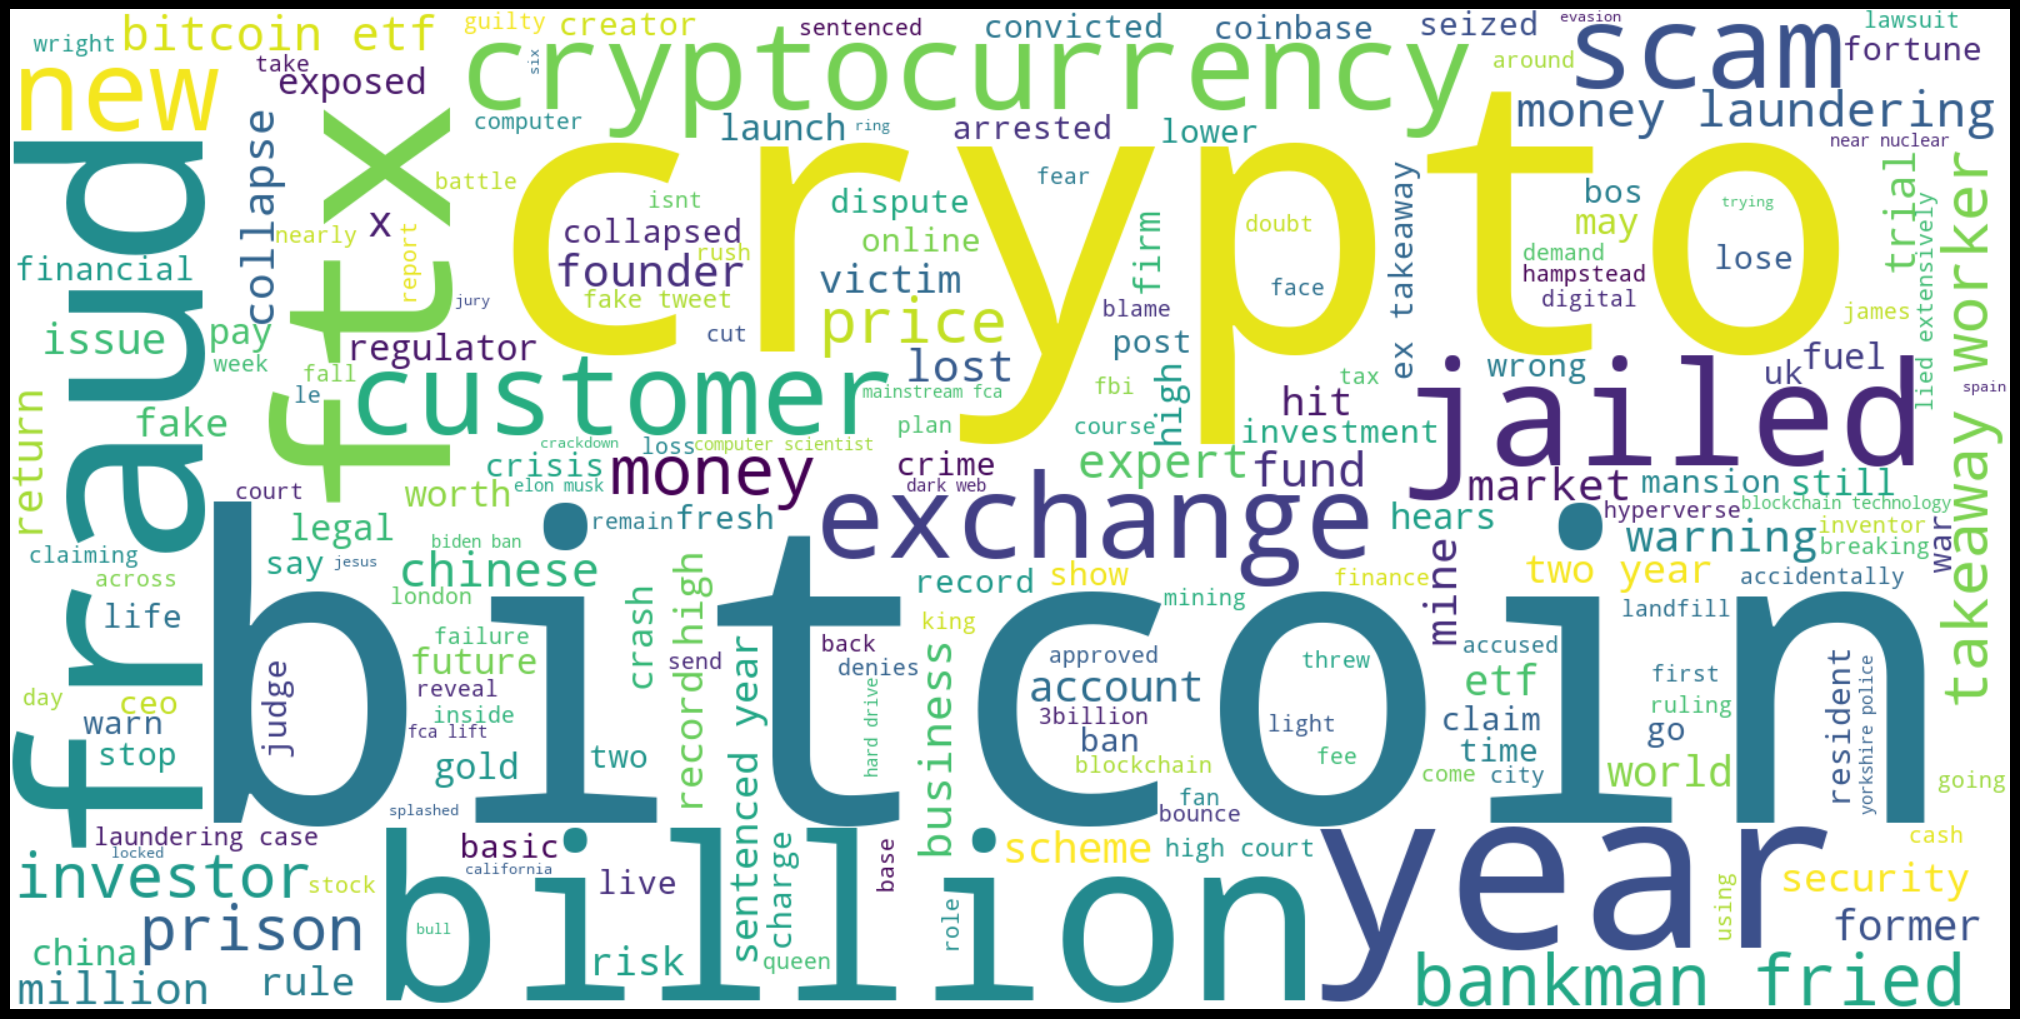

In [60]:
# look at each Sentiment words separately  e.g., negative, positive and neutral

# creating a negative sentiments df by filtering only negative samples
neg_df = dfv[dfv['final_sentiment']=='negative']

# Joining all tge Lem Headlines into text
text_neg = ' '.join(neg_df['Lem Headline'])

# Create a word cloud
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text_neg)

# Display the word cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

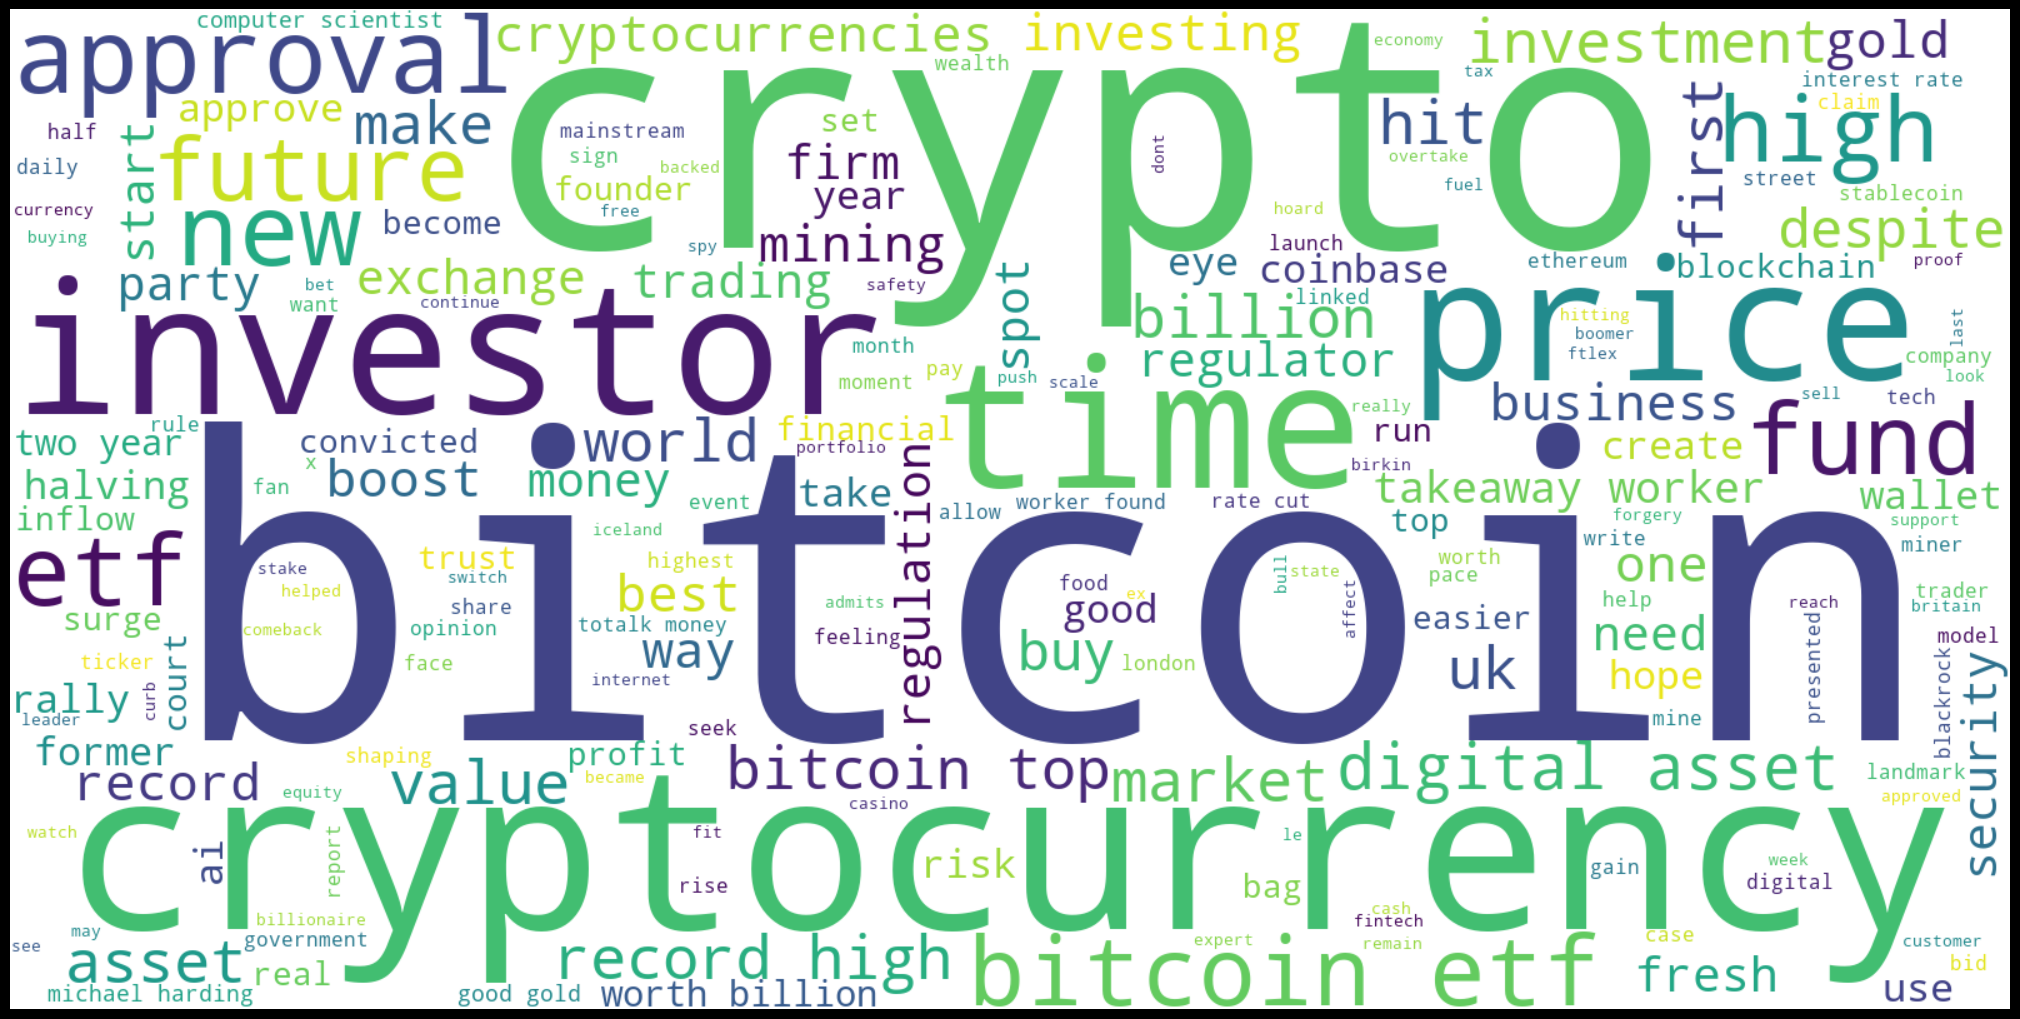

In [61]:
# look at each Sentiment words separately  e.g., negative, positive and neutral

# creating a positive sentiments df by filtering only positive samples
pos_df = dfv[dfv['final_sentiment']=='positive']
text_pos = ' '.join(pos_df['Lem Headline'])

# Create a word cloud

wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text_pos)

# Display the word cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

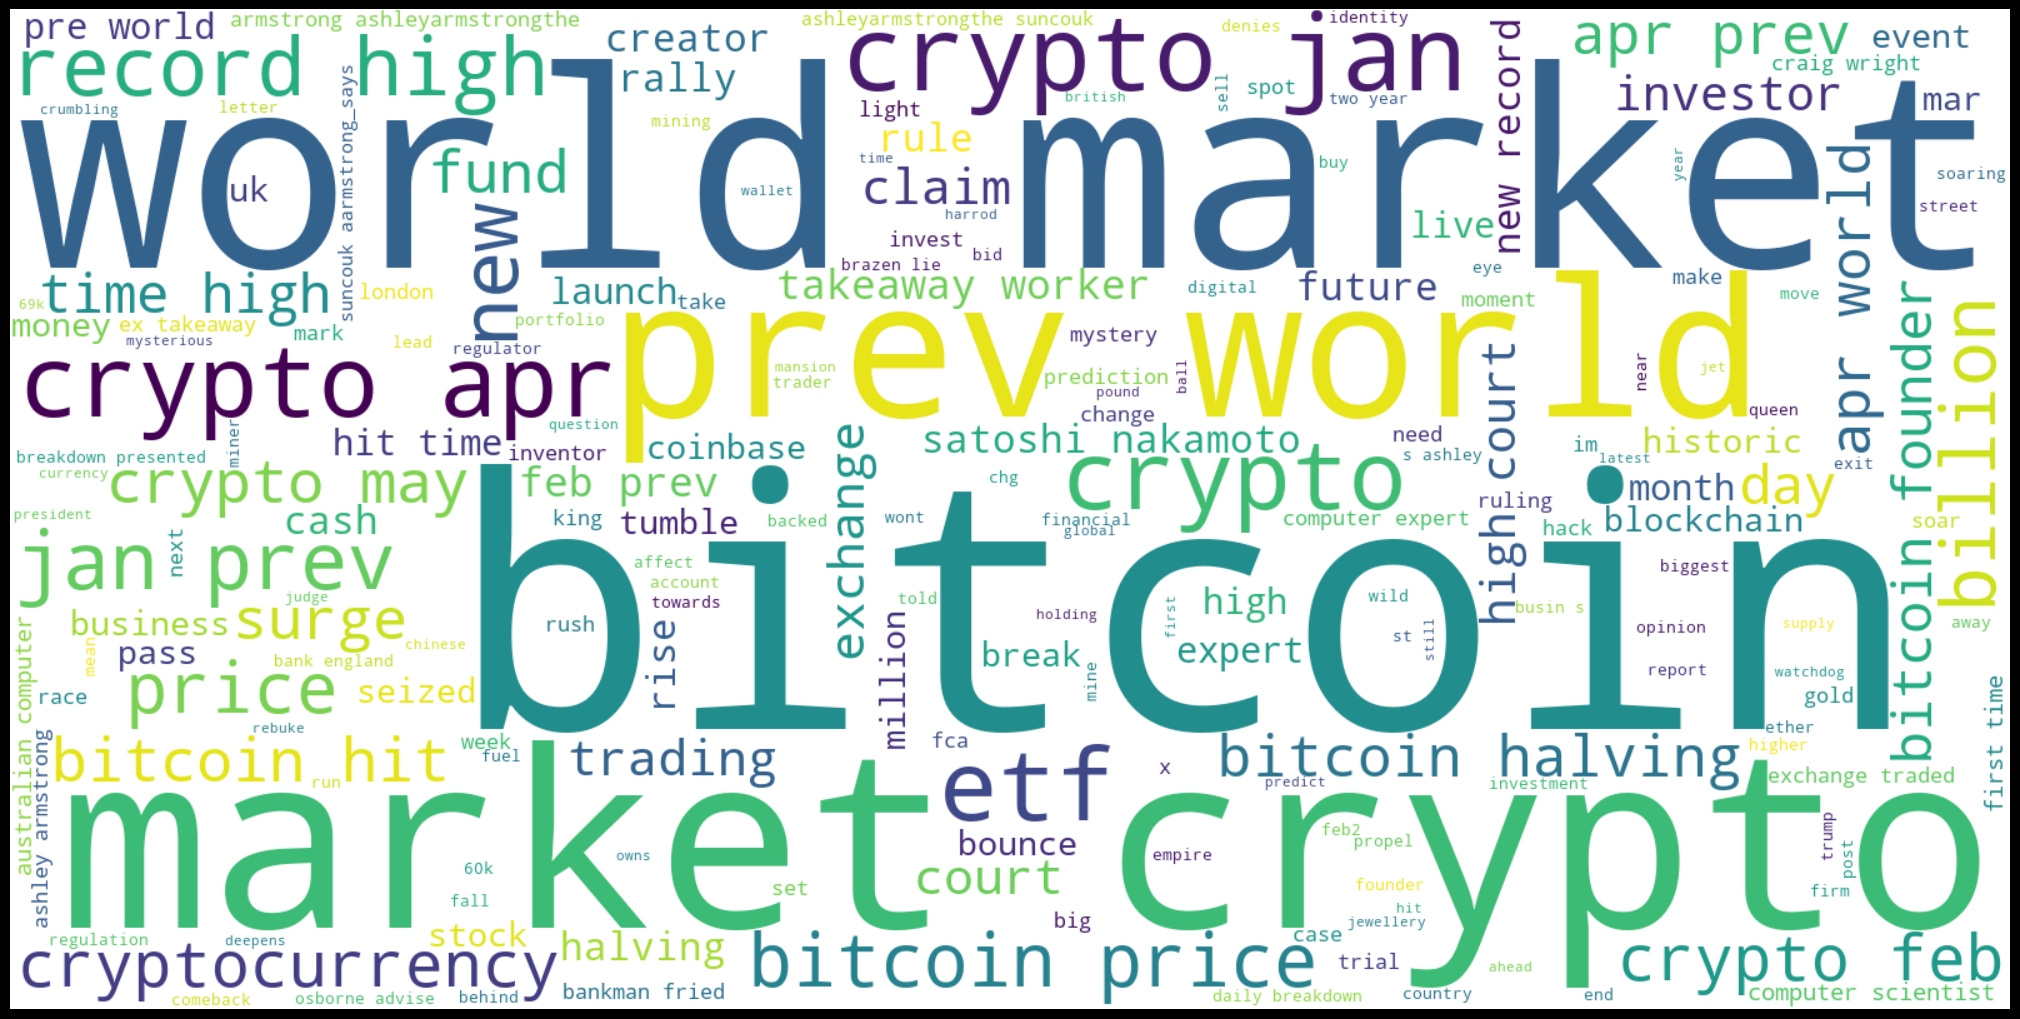

In [62]:
# look at each Sentiment words separately  e.g., negative, positive and neutral

# creating a neutral sentiments df by filtering only neutral samples
neut_df = dfv[dfv['final_sentiment']=='neutral']
text_neut = ' '.join(neut_df['Lem Headline'])

# Create a word cloud

wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text_neut)

# Display the word cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [63]:
# Checking the null values inside the dataframe.
dfv.isnull().sum()

Unnamed: 0            0
Published date        0
Countries            13
Company             491
Headline              0
Cleaned Headline      0
Lem Headline          0
Count                 0
sentiment_scores      0
neg                   0
neu                   0
pos                   0
compound              0
neg.1                 0
neu.1                 0
pos.1                 0
compound.1            0
final_sentiment       0
dtype: int64

In [64]:
# checking the data types of the columns
dfv.dtypes

Unnamed: 0            int64
Published date       object
Countries            object
Company              object
Headline             object
Cleaned Headline     object
Lem Headline         object
Count                 int64
sentiment_scores     object
neg                 float64
neu                 float64
pos                 float64
compound            float64
neg.1               float64
neu.1               float64
pos.1               float64
compound.1          float64
final_sentiment      object
dtype: object

In [65]:
# Converting Published date to datetime object
dfv['Published date'] = pd.to_datetime(dfv['Published date'], format='%d/%m/%Y')
dfv

Unnamed: 0 Published date  \
0             0     2024-05-30   
1             1     2024-06-06   
2             2     2024-05-21   
3             3     2024-05-26   
4             4     2024-05-21   
..          ...            ...   
839        3113     2024-03-11   
840        3114     2024-03-11   
841        3115     2024-03-06   
842        3116     2024-01-14   
843        3117     2024-01-11   

                                             Countries  \
0                                      England & Wales   
1                                      England & Wales   
2    United Kingdom of Great Britain and Northern I...   
3    United Kingdom of Great Britain and Northern I...   
4    United Kingdom of Great Britain and Northern I...   
..                                                 ...   
839                                      United States   
840                                      United States   
841                                      United States   
842                                      United States   
843                                      United States   

                              Company  \
0                                 NaN   
1                            BEST INC   
2                                 NaN   
3      METROPOLITAN BANK HOLDING CORP   
4                     BIRD & BIRD LLP   
..                                ...   
839                               NaN   
840  SECURITIES & EXCHANGE COMMISSION   
841                               NaN   
842                     BANK OF KOREA   
843  SECURITIES & EXCHANGE COMMISSION   

                                              Headline  \
0                  Woman jailed for Bitcoin laundering   
1    Best Crypto Casino Sites & Bitcoin Casinos in ...   
2        Wright lied extensively as 'bitcoin inventor'   
3    Ex-takeaway worker with Bitcoin worth more tha...   
4              Inventor of bitcoin' given court rebuke   
..                                                 ...   
839    Bitcoin Soars Above $71000 To New All-time High   
840  Bitcoin tops 100 mln won in S. Korea for 1st time   
841  Bitcoin bounces to all-time high, two years af...   
842  Financial authorities rule out possibility of ...   
843  SEC chairman denies bitcoin ETF has been appro...   

                                      Cleaned Headline  \
0                            jailed bitcoin laundering   
1          best crypto casino sites bitcoin casinos uk   
2             wright lied extensively bitcoin inventor   
3    ex takeaway worker bitcoin worth 2 billion jai...   
4                  inventor bitcoin given court rebuke   
..                                                 ...   
839                  bitcoin soars 71000 new time high   
840                bitcoin tops 100 mln korea 1st time   
841        bitcoin bounces time high two years scandal   
842  financial authorities rule possibility bitcoin...   
843  chairman denies bitcoin etf approved account x...   

                                          Lem Headline  Count  \
0                            jailed bitcoin laundering      1   
1            best crypto casino site bitcoin casino uk      2   
2             wright lied extensively bitcoin inventor      1   
3    ex takeaway worker bitcoin worth 2 billion jai...      1   
4                  inventor bitcoin given court rebuke      1   
..                                                 ...    ...   
839                   bitcoin soar 71000 new time high      1   
840                 bitcoin top 100 mln korea 1st time      1   
841          bitcoin bounce time high two year scandal      1   
842  financial authority rule possibility bitcoin e...      1   
843  chairman denies bitcoin etf approved account x...      2   

                                      sentiment_scores    neg    neu    pos  \
0    {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...  0.615  0.385  0.000   
1    {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...  0.000  0.588  0.4

In [66]:
# Converting Published date to string object as a new column
dfv['Date'] = dfv['Published date'].dt.strftime('%Y-%m-%d')
dfv.head()

Unnamed: 0 Published date  \
0           0     2024-05-30   
1           1     2024-06-06   
2           2     2024-05-21   
3           3     2024-05-26   
4           4     2024-05-21   

                                           Countries  \
0                                    England & Wales   
1                                    England & Wales   
2  United Kingdom of Great Britain and Northern I...   
3  United Kingdom of Great Britain and Northern I...   
4  United Kingdom of Great Britain and Northern I...   

                          Company  \
0                             NaN   
1                        BEST INC   
2                             NaN   
3  METROPOLITAN BANK HOLDING CORP   
4                 BIRD & BIRD LLP   

                                            Headline  \
0                Woman jailed for Bitcoin laundering   
1  Best Crypto Casino Sites & Bitcoin Casinos in ...   
2      Wright lied extensively as 'bitcoin inventor'   
3  Ex-takeaway worker with Bitcoin worth more tha...   
4            Inventor of bitcoin' given court rebuke   

                                    Cleaned Headline  \
0                          jailed bitcoin laundering   
1        best crypto casino sites bitcoin casinos uk   
2           wright lied extensively bitcoin inventor   
3  ex takeaway worker bitcoin worth 2 billion jai...   
4                inventor bitcoin given court rebuke   

                                        Lem Headline  Count  \
0                          jailed bitcoin laundering      1   
1          best crypto casino site bitcoin casino uk      2   
2           wright lied extensively bitcoin inventor      1   
3  ex takeaway worker bitcoin worth 2 billion jai...      1   
4                inventor bitcoin given court rebuke      1   

                                    sentiment_scores    neg    neu    pos  \
0  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...  0.615  0.385  0.000   
1  {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...  0.000  0.588  0.412   
2  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...  0.394  0.606  0.000   
3  {'neg': 0.244, 'neu': 0.611, 'pos': 0.145, 'co...  0.244  0.611  0.145   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   

   compound  neg.1  neu.1  pos.1  compound.1 final_sentiment        Date  
0   -0.4939  0.615  0.385  0.000     -0.4939        negative  2024-05-30  
1    0.6369  0.000  0.588  0.412      0.6369        positive  2024-06-06  
2   -0.3818  0.394  0.606  0.000     -0.3818        negative  2024-05-21  
3   -0.3182  0.244  0.611  0.145     -0.3182        negative  2024-05-26  
4    0.0000  0.000  1.000  0.000      0.0000         neutral  2024-05-21

In [67]:
# checking the data types of the columns
dfv.dtypes

Unnamed: 0                   int64
Published date      datetime64[ns]
Countries                   object
Company                     object
Headline                    object
Cleaned Headline            object
Lem Headline                object
Count                        int64
sentiment_scores            object
neg                        float64
neu                        float64
pos                        float64
compound                   float64
neg.1                      float64
neu.1                      float64
pos.1                      float64
compound.1                 float64
final_sentiment             object
Date                        object
dtype: object

In [68]:
dfv.shape

(844, 19)

### Further analysis correlation between compound Score and Closing Bitcoin Price

In [69]:
# Loading the Bitcoin price data
btc_df = pd.read_csv('/Users/mgarar/Desktop/BTC-USD6m.csv')
btc_df

Date          Open          High           Low         Close  \
0    2023-06-11  25854.031250  26203.439453  25668.986328  25940.167969   
1    2023-06-12  25934.285156  26087.919922  25675.197266  25902.500000   
2    2023-06-13  25902.941406  26376.351563  25728.365234  25918.728516   
3    2023-06-14  25920.257813  26041.800781  24902.152344  25124.675781   
4    2023-06-15  25121.673828  25735.308594  24797.167969  25576.394531   
..          ...           ...           ...           ...           ...   
362  2024-06-07  70759.187500  71907.851563  68507.257813  69342.585938   
363  2024-06-08  69324.179688  69533.320313  69210.742188  69305.773438   
364  2024-06-09  69297.492188  69817.523438  69160.843750  69647.992188   
365  2024-06-10  69644.312500  70146.070313  69232.421875  69512.281250   
366  2024-06-11  69508.078125  69544.414063  66763.250000  66924.609375   

        Adj Close       Volume  
0    25940.167969  10732609603  
1    25902.500000  11677889997  
2    25918.728516  14143474486  
3    25124.675781  14265717766  
4    25576.394531  15837384409  
..            ...          ...  
362  69342.585938  36188381096  
363  69305.773438  14262185861  
364  69647.992188  13534028500  
365  69512.281250  20597699541  
366  66924.609375  31488579584  

[367 rows x 7 columns]

In [70]:
# Joining the two dataframes that are sentiment vader dataframe and bitcoin price data frame on common column Date.
merged_df = dfv.merge(btc_df, on='Date', how='left')
merged_df.head(10)

Unnamed: 0 Published date  \
0           0     2024-05-30   
1           1     2024-06-06   
2           2     2024-05-21   
3           3     2024-05-26   
4           4     2024-05-21   
5           6     2024-05-21   
6           7     2024-05-29   
7           8     2024-05-26   
8           9     2024-05-16   
9          10     2024-05-22   

                                           Countries  \
0                                    England & Wales   
1                                    England & Wales   
2  United Kingdom of Great Britain and Northern I...   
3  United Kingdom of Great Britain and Northern I...   
4  United Kingdom of Great Britain and Northern I...   
5  United Kingdom of Great Britain and Northern I...   
6                                    England & Wales   
7                                    England & Wales   
8  United Kingdom of Great Britain and Northern I...   
9                                    England & Wales   

                              Company  \
0                                 NaN   
1                            BEST INC   
2                                 NaN   
3      METROPOLITAN BANK HOLDING CORP   
4                     BIRD & BIRD LLP   
5                                 NaN   
6                                 NaN   
7                                 NaN   
8                                 NaN   
9  STANDARD CHARTERED BANK (THAI) PCL   

                                            Headline  \
0                Woman jailed for Bitcoin laundering   
1  Best Crypto Casino Sites & Bitcoin Casinos in ...   
2      Wright lied extensively as 'bitcoin inventor'   
3  Ex-takeaway worker with Bitcoin worth more tha...   
4            Inventor of bitcoin' given court rebuke   
5  Judge rules Wright lied 'extensively' during b...   
6  Researchers ‘hack time’ to recover $3 million ...   
7  Takeaway worker who tried to buy 23m Hampstead...   
8  What is Bitcoin halving – and how does it affe...   
9  Bitcoin price rallies as crypto experts predic...   

                                    Cleaned Headline  \
0                          jailed bitcoin laundering   
1        best crypto casino sites bitcoin casinos uk   
2           wright lied extensively bitcoin inventor   
3  ex takeaway worker bitcoin worth 2 billion jai...   
4                inventor bitcoin given court rebuke   
5  judge rules wright lied extensively bitcoin trial   
6  researchers hack time recover 3 million bitcoi...   
7  takeaway worker tried buy 23m hampstead mansio...   
8                       bitcoin halving affect price   
9  bitcoin price rallies crypto experts predict n...   

                                        Lem Headline  Count  \
0                          jailed bitcoin laundering      1   
1          best crypto casino site bitcoin casino uk      2   
2           wright lied extensively bitcoin inventor      1   
3  ex takeaway worker bitcoin worth 2 billion jai...      1   
4                inventor bitcoin given court rebuke      1   
5   judge rule wright lied extensively bitcoin trial      1   
6  researcher hack time recover 3 million bitcoin...      2   
7  takeaway worker tried buy 23m hampstead mansio...      1   
8                       bitcoin halving affect price      2   
9  bitcoin price rally crypto expert predict new ...      2   

                                    sentiment_scores    neg  ...  pos.1  \
0  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...  0.615  ...  0.000   
1  {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...  0.000  ...  0.412   
2  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...  0.394  ...  0.000   
3  {'neg': 0.244, 'neu': 0.611, 'pos': 0.145, 'co...  0.244  ...  0.145   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  ...  0.000   
5  {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp...  0.302  ...  0.000   
6  {'neg': 0.286, 'neu': 0.571, 'pos': 0.143, 'co...  0.000  ...  0.000   
7  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp... 

In [71]:
# Analysing the correlation between compound score and bitcoin closing prices.
filter_df = merged_df[['compound', 'Close']]
filter_df.corr()

compound     Close
compound  1.000000 -0.061947
Close    -0.061947  1.000000

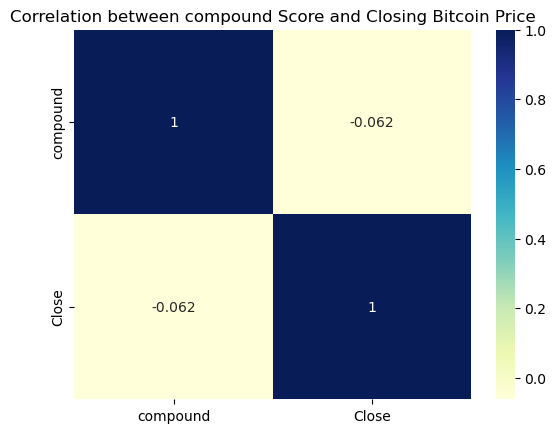

In [72]:
dataplot = sns.heatmap(filter_df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap
plt.title('Correlation between compound Score and Closing Bitcoin Price')
plt.show() 

-  A value of -0.061947 indicates a very weak negative correlation.
-  This means there's a slight tendency for the compound sentiment score to move in the opposite direction of Bitcoin's closing price, but the relationship is very weak.
-  At -0.061947, this correlation is very weak, almost negligible.
-  It implies that knowing the sentiment score would not be very helpful in predicting Bitcoins price, at least in a simple, linear way.

### Further exploration

In [73]:
def plot_bigrams(df_column=None, title=None):
    
    word_data = dfv[df_column].tolist()
    word_data = [i.split(' ') for i in word_data]
    word_data = [item for sublist in word_data for item in sublist]
    bigrams = (pd.Series(nltk.ngrams(word_data, 2)).value_counts())[:10]
    bigrams.sort_values().plot.barh(figsize=(5, 5), title=title)

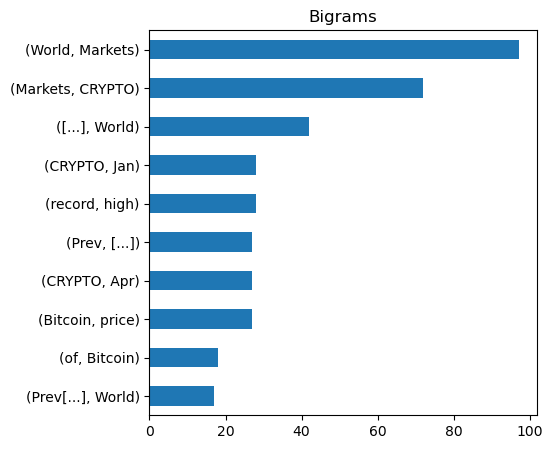

In [74]:
plot_bigrams(df_column='Headline', title='Bigrams')

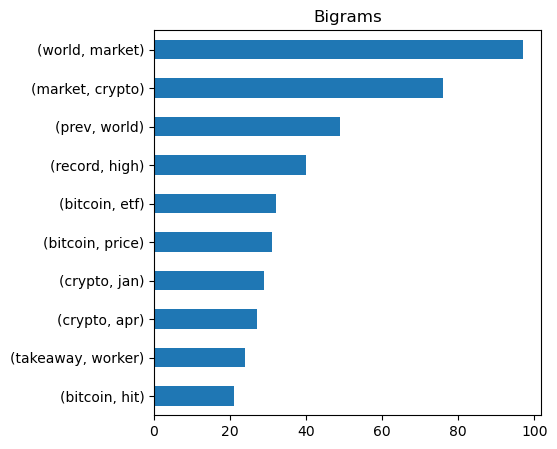

In [75]:
plot_bigrams(df_column='Lem Headline', title='Bigrams')

In [76]:
# Top 10 positive reviews
dfv[dfv['compound'] >= 0.05].sort_values('pos', 
                                  ascending = False)[['Lem Headline', 
                                                      'pos']].head(10)

Lem Headline    pos
511                                       bitcoin hope  0.744
303          bitcoin fan eagerly await green light etf  0.612
687                 crypto gain 800 billion value year  0.592
77                  one really know true value bitcoin  0.589
123                best way buy bitcoin good time cash  0.587
630                          crypto conundrum best way  0.583
604            feeling wanted bitcoin achieves greater  0.571
442  best cold wallet ultimate security crypto inve...  0.569
431  limewire everyone happy new crypto focused dir...  0.558
537                                53600 value bitcoin  0.545

In [77]:
# Top 10 negative reviews

dfv[dfv['compound'] >= - 0.05].sort_values('neg', 
                                  ascending = False)[['Lem Headline', 
                                                      'pos']].head(10)

Lem Headline    pos
506                asset frozen bitcoin founder battle  0.309
777            business post bitcoin etf approval fake  0.304
199                   im brave enough bitcoin ill hfsp  0.333
139               bitcoin fall record high frenzy cool  0.267
285  fake bitcoin approval post facilitated sim swa...  0.254
775    x account hacked apparent bitcoin fund approval  0.287
513                       bitcoin asset stored offline  0.417
299  craig wright denies forging document support b...  0.235
323  chair denies bitcoin etf approved account x co...  0.241
489  farage farrago crypto crime river cash 2023 ob...  0.233

## Visual Comparison between Vader and TextBlob¶


In [6]:
def get_sentiment(score):
    """
    Returns the sentiment based on compound score
    """
    
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [7]:
def assign_sentiment_label(sentiment_score):
    if sentiment_score < 0:
        return 'negative'
    elif sentiment_score == 0:
        return 'neutral'
    else:
        return 'positive'

In [8]:
# Creating a new column based on compound score to get the sentiment as positive, negative or neutral using the function.
dfv['vader_analysis'] = dfv.compound.apply(lambda x: get_sentiment(x))

In [9]:
def get_polarity(review):
    return TextBlob(review).sentiment.polarity

In [10]:
dfv['text_blob_polarity'] = dfv['Lem Headline'].apply(lambda x: get_polarity(x))
dfv['textBlob_Analysis'] = dfv.text_blob_polarity.apply(assign_sentiment_label)

In [11]:
dfv.head()

Unnamed: 0 Published date  \
0           0     30/05/2024   
1           1     06/06/2024   
2           2     21/05/2024   
3           3     26/05/2024   
4           4     21/05/2024   

                                           Countries  \
0                                    England & Wales   
1                                    England & Wales   
2  United Kingdom of Great Britain and Northern I...   
3  United Kingdom of Great Britain and Northern I...   
4  United Kingdom of Great Britain and Northern I...   

                          Company  \
0                             NaN   
1                        BEST INC   
2                             NaN   
3  METROPOLITAN BANK HOLDING CORP   
4                 BIRD & BIRD LLP   

                                            Headline  \
0                Woman jailed for Bitcoin laundering   
1  Best Crypto Casino Sites & Bitcoin Casinos in ...   
2      Wright lied extensively as 'bitcoin inventor'   
3  Ex-takeaway worker with Bitcoin worth more tha...   
4            Inventor of bitcoin' given court rebuke   

                                    Cleaned Headline  \
0                          jailed bitcoin laundering   
1        best crypto casino sites bitcoin casinos uk   
2           wright lied extensively bitcoin inventor   
3  ex takeaway worker bitcoin worth 2 billion jai...   
4                inventor bitcoin given court rebuke   

                                        Lem Headline  Count  \
0                          jailed bitcoin laundering      1   
1          best crypto casino site bitcoin casino uk      2   
2           wright lied extensively bitcoin inventor      1   
3  ex takeaway worker bitcoin worth 2 billion jai...      1   
4                inventor bitcoin given court rebuke      1   

                                    sentiment_scores    neg    neu    pos  \
0  {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...  0.615  0.385  0.000   
1  {'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...  0.000  0.588  0.412   
2  {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...  0.394  0.606  0.000   
3  {'neg': 0.244, 'neu': 0.611, 'pos': 0.145, 'co...  0.244  0.611  0.145   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   

   compound  neg.1  neu.1  pos.1  compound.1 vader_analysis  \
0   -0.4939  0.615  0.385  0.000     -0.4939       negative   
1    0.6369  0.000  0.588  0.412      0.6369       positive   
2   -0.3818  0.394  0.606  0.000     -0.3818       negative   
3   -0.3182  0.244  0.611  0.145     -0.3182       negative   
4    0.0000  0.000  1.000  0.000      0.0000        neutral   

   text_blob_polarity textBlob_Analysis  
0                 0.0           neutral  
1                 1.0          positive  
2                 0.0           neutral  
3                 0.3          positive  
4                 0.0           neutral

In [12]:
tb_counts = dfv.textBlob_Analysis.value_counts()
vader_counts = dfv.vader_analysis.value_counts()

tb_counts, vader_counts

(textBlob_Analysis
 neutral     480
 positive    250
 negative    114
 Name: count, dtype: int64,
 vader_analysis
 neutral     403
 negative    230
 positive    211
 Name: count, dtype: int64)

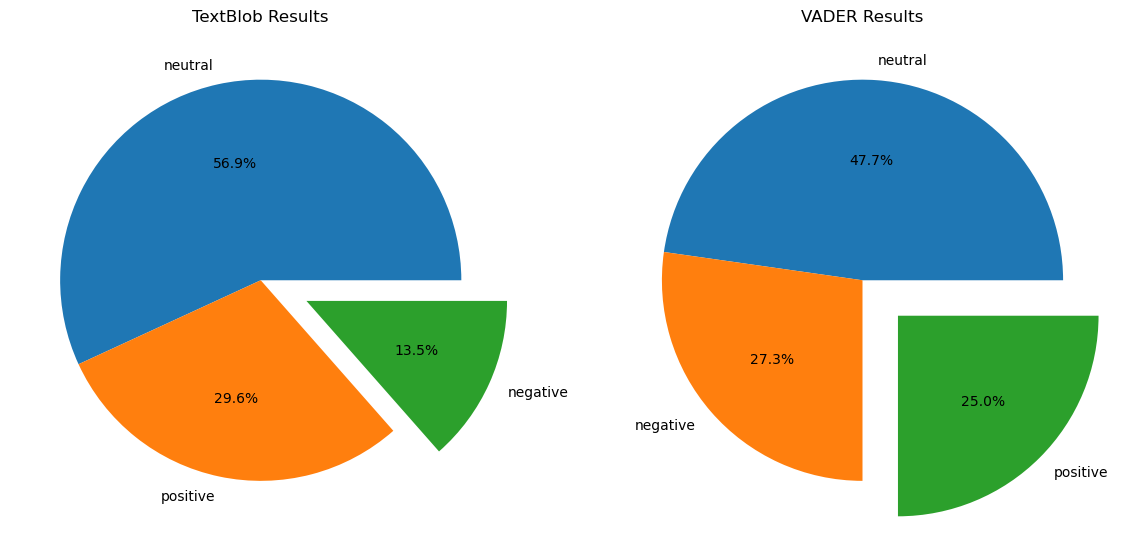

In [13]:
plt.figure(figsize=(22,7))

plt.subplot(1,3,1)
plt.title("TextBlob Results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title("VADER Results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.show()

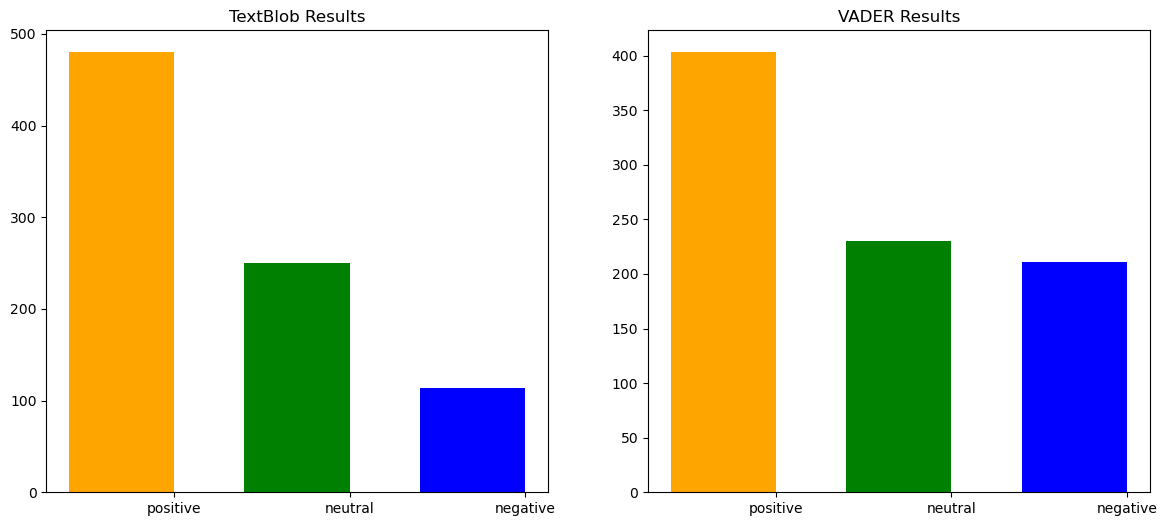

In [14]:
labels = ['positive', 'neutral', 'negative']

textblob_values = list(tb_counts.values)
vader_values = list(vader_counts.values)

x = np.arange(len(labels))
width = 0.6

plt.figure(figsize=(22,6))

plt.subplot(1,3,1)
plt.title("TextBlob Results")
plt.bar(x-width/2, textblob_values, width, color=['orange', 'green', 'blue'])
plt.xticks([0,1,2], labels)


plt.subplot(1,3,2)
plt.title("VADER Results")
plt.bar(x-width/2, vader_values, width, color=['orange', 'green', 'blue'])
plt.xticks([0,1,2], labels)

plt.show()

#### From the above pie charts and bar plot comparisons, it could be infered that most of the News headlines are positive. On the other hand, the number  neutrals are nearly equals while the the negatives are show significant different. VADER negative shows 27.3 % while TextBlob score shows 13.5 %. This indicates that VADER identified more New Headlines as negative than TextBlob